<a href="https://colab.research.google.com/github/5dongdong/PY_AI/blob/master/NoShow_EDA_ysy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 확인

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Ai_mini_project/medical_noshow.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df.info() #결측지 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# 2. 데이터 전처리 



*   불필요한 'AppointmentID' 제거 
*   No-show 데이터 수정 ( 1- 병원 예약 취소 )





In [ ]:
print(len(df['PatientId'].unique()))  # 'PatientId' 열에서 고유한 값들의 개수
print(len(df['AppointmentID'].unique()))  # 'AppointmentID' 열에서 고유한 값들의 개수

62299
110527


In [5]:
df.drop('AppointmentID', axis=1, inplace=True) # AppointmentID 열 제거 
df

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
print(df['No-show'].value_counts())

No     88208
Yes    22319
Name: No-show, dtype: int64


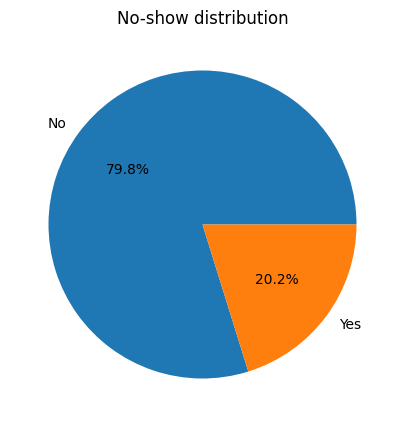

In [ ]:
# 'No-show'비율 그래프 확인
no_show_counts = df['No-show'].value_counts()

plt.figure(figsize=(5,5))  # 차트의 크기 설정
plt.pie(no_show_counts, labels = no_show_counts.index, autopct='%1.1f%%')  # 파이 차트.
plt.title('No-show distribution')  # 그래프 제목
plt.show() 

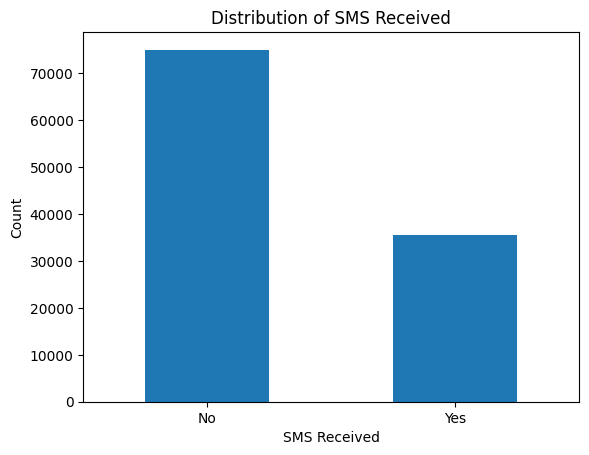

In [ ]:
# 'SMS_received' 막대 그래프 
sms_counts = df['SMS_received'].value_counts()

sms_counts.plot(kind='bar')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.title('Distribution of SMS Received')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

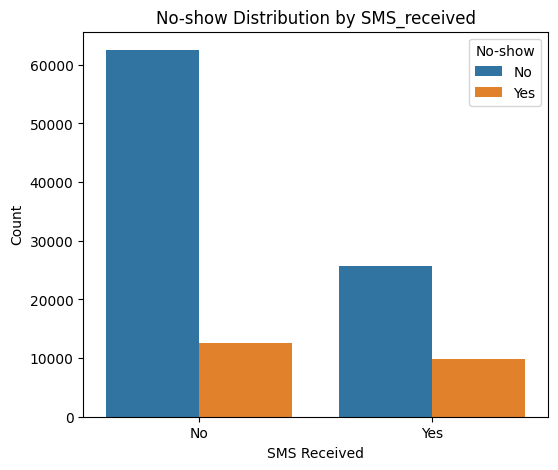

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title('No-show Distribution by SMS_received')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.show()

------------------------------------------------------------------------------

In [ ]:
# 'No-show' 열의 고유한 값들의 수를 계산
no_show_counts = df['No-show'].value_counts()

# 파이 차트를 그립니다.
plt.figure(figsize=(5,5))  # 차트의 크기를 설정합니다.
plt.pie(no_show_counts, labels = no_show_counts.index, autopct='%1.1f%%')  # 파이 차트를 그립니다.
plt.title('No-show distribution')  # 차트의 제목을 설정합니다.
plt.show()  #차트를 보여줍니다.

In [ ]:
#'PatientId'를 기준으로 데이터프레임 그룹화
grouped_df = df.groupby('PatientId')
appointment_counts = grouped_df['AppointmentID'].size() # 각 그룹별 'AppointmentID' 개수 확인
max_appointment_count = appointment_counts.max()   
print("가장 많은 AppointmentID 개수:", max_appointment_count)

가장 많은 AppointmentID 개수: 88


In [ ]:
# 가장 많은 'AppointmentID' 개수를 가진 사람의 'PatientId' 찾기
max_appointment_patient_id = appointment_counts.idxmax()
print("가장 많은 AppointmentID를 가진 PatientId:", max_appointment_patient_id)

가장 많은 AppointmentID를 가진 PatientId: 822145925426128.0


In [ ]:
max_appointment_patient = df[df['PatientId'] == 822145925426128.0]

In [ ]:
df[df['PatientId'] == 822145925426128.0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3006,8.221459e+14,5638995,M,2016-04-29T08:38:44Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
3060,8.221459e+14,5642878,M,2016-04-29T18:02:42Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
3093,8.221459e+14,5640809,M,2016-04-29T11:27:34Z,2016-04-29T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
6984,8.221459e+14,5705135,M,2016-05-16T18:38:11Z,2016-05-16T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
6985,8.221459e+14,5668887,M,2016-05-06T09:54:32Z,2016-05-06T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109103,8.221459e+14,5790220,M,2016-06-08T17:18:03Z,2016-06-08T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
109114,8.221459e+14,5761322,M,2016-06-01T17:17:07Z,2016-06-01T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,0,No
109185,8.221459e+14,5696863,M,2016-05-13T14:28:49Z,2016-06-02T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,1,No
109211,8.221459e+14,5732192,M,2016-05-24T11:08:07Z,2016-06-03T00:00:00Z,38,REDENÇÃO,0,0,0,0,0,1,No


In [ ]:
grouped_df = df.groupby('PatientId')['AppointmentDay'].count().reset_index()
#grouped_df = df.groupby('PatientId')['AppointmentDay']

In [ ]:
grouped_df

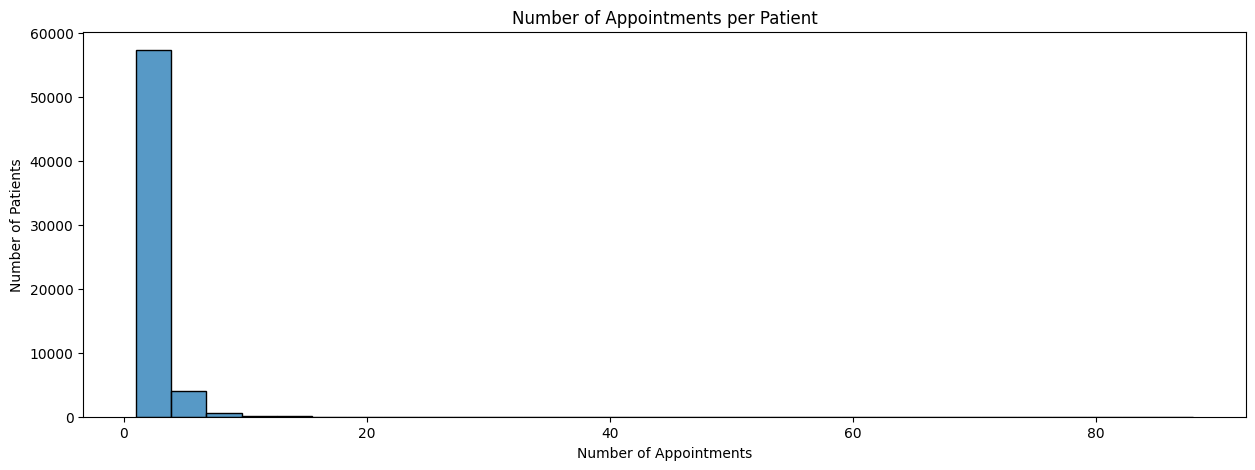

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(grouped_df['AppointmentDay'], kde=False, bins=30)
plt.title('Number of Appointments per Patient')
plt.xlabel('Number of Appointments')
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
len(df['AppointmentID'].unique())

110527

In [ ]:
max_appointment_patient = df[df['PatientId'] == 822145925426128.0]
max_appointment_patient['AppointmentID']

PatientId
3.921784e+04    1
4.374176e+04    1
9.377953e+04    1
1.417242e+05    1
5.376153e+05    1
               ..
9.999320e+14    5
9.999350e+14    1
9.999465e+14    1
9.999686e+14    1
9.999816e+14    1
Name: AppointmentID, Length: 62299, dtype: int64

In [ ]:
# 'PatientId'를 기준으로 데이터프레임 그룹화
grouped_df = df.groupby('PatientId')

# 각 그룹별 'AppointmentID' 개수 확인
appointment_counts = grouped_df['AppointmentID'].size()

# 가장 많은 'AppointmentID' 개수를 가진 사람의 'PatientId' 찾기
max_appointment_patient_id = appointment_counts.idxmax()

# 결과 출력
print("가장 많은 AppointmentID를 가진 PatientId:", max_appointment_patient_id)

가장 많은 AppointmentID를 가진 PatientId: 822145925426128.0
